In [1]:
import os,shutil

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

In [5]:
# data generator 
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input) 

In [7]:
df = pd.read_excel('/home/b05501009/Jubo/7_8/dataset/Train_TWCC.xlsx')
train_generator=train_datagen.flow_from_dataframe(
    dataframe=df, 
    directory=None,
    x_col="編號",
    y_col= "等級",
    class_mode="categorical",
    target_size=(224,224),
    batch_size=16,
    Seed = 501009
)

df = pd.read_excel('/home/b05501009/Jubo/7_8/dataset/Val_TWCC.xlsx')
val_generator=train_datagen.flow_from_dataframe(
    dataframe=df, 
    directory=None,
    x_col="編號",
    y_col= "等級",
    class_mode="categorical",
    target_size=(224,224),
    batch_size=16,
    Seed = 501009
)

Found 540 validated image filenames belonging to 4 classes.
Found 105 validated image filenames belonging to 4 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


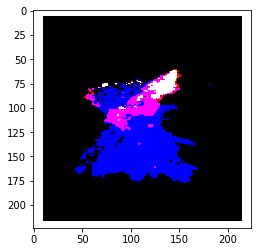

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [11]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
for a,b in train_generator:
    #print(a[0])
    k = a[0]
    plt.imshow(a[0], interpolation='nearest')
    plt.show()
    print(b)
    break

In [19]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable=False
top_model = tf.keras.models.Sequential()
top_model.add(tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(tf.keras.layers.Dropout(0.5))
top_model.add(tf.keras.layers.Dense(64, kernel_initializer='normal'))
top_model.add(tf.keras.layers.BatchNormalization())
top_model.add(tf.keras.layers.Activation('relu'))
top_model.add(tf.keras.layers.Dense(64, kernel_initializer='normal'))
top_model.add(tf.keras.layers.BatchNormalization())
top_model.add(tf.keras.layers.Activation('relu'))
top_model.add(tf.keras.layers.Dense(4,activation='softmax'))
model = tf.keras.models.Model(base_model.inputs, top_model(base_model.output))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
model.compile(optimizer=tf.keras.optimizers.Nadam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [21]:
reduce_lr = ReduceLROnPlateau(factor = 0.5,
                              monitor = 'val_loss',
                              min_lr = 0.000001,
                              patience = 10,
                              verbose = 1)

filepath = os.path.join('/home/b05501009/Jubo/7_8/model',"model_segmentment.hdf5")
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')


In [22]:
#VGG16 preprocess
model_history = model.fit(train_generator,
                          steps_per_epoch=34,
                          epochs=300,
                          validation_data=val_generator,
                          validation_steps=7,
                          verbose=1,
                          callbacks=[reduce_lr,checkpoint]
                          )

Epoch 1/300
33/34 [============================>.] - ETA: 0s - loss: 1.4783 - acc: 0.3130
Epoch 00001: val_acc improved from -inf to 0.40000, saving model to /home/b05501009/Jubo/7_8/model/model_segmentment.hdf5
34/34 [==============================] - 3s 94ms/step - loss: 1.4682 - acc: 0.3185 - val_loss: 1.3090 - val_acc: 0.4000 - lr: 1.0000e-04
Epoch 2/300
33/34 [============================>.] - ETA: 0s - loss: 1.3930 - acc: 0.3683
Epoch 00002: val_acc improved from 0.40000 to 0.45714, saving model to /home/b05501009/Jubo/7_8/model/model_segmentment.hdf5
34/34 [==============================] - 3s 82ms/step - loss: 1.3968 - acc: 0.3722 - val_loss: 1.2518 - val_acc: 0.4571 - lr: 1.0000e-04
Epoch 3/300
34/34 [==============================] - ETA: 0s - loss: 1.3065 - acc: 0.4407
Epoch 00003: val_acc did not improve from 0.45714
34/34 [==============================] - 1s 34ms/step - loss: 1.3065 - acc: 0.4407 - val_loss: 1.3041 - val_acc: 0.4476 - lr: 1.0000e-04
Epoch 4/300
33/34 [===

Epoch 30/300
34/34 [==============================] - ETA: 0s - loss: 0.5922 - acc: 0.7759
Epoch 00030: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 43ms/step - loss: 0.5922 - acc: 0.7759 - val_loss: 1.1731 - val_acc: 0.5333 - lr: 1.0000e-04
Epoch 31/300
33/34 [============================>.] - ETA: 0s - loss: 0.5637 - acc: 0.8015
Epoch 00031: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.5554 - acc: 0.8074 - val_loss: 1.2685 - val_acc: 0.5333 - lr: 1.0000e-04
Epoch 32/300
34/34 [==============================] - ETA: 0s - loss: 0.5703 - acc: 0.8259
Epoch 00032: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 35ms/step - loss: 0.5703 - acc: 0.8259 - val_loss: 1.2452 - val_acc: 0.5238 - lr: 1.0000e-04
Epoch 33/300
34/34 [==============================] - ETA: 0s - loss: 0.5567 - acc: 0.8130
Epoch 00033: val_acc did not improve from 0.60000
34/34 [==================

Epoch 59/300
34/34 [==============================] - ETA: 0s - loss: 0.4398 - acc: 0.8574
Epoch 00059: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4398 - acc: 0.8574 - val_loss: 1.2487 - val_acc: 0.5143 - lr: 1.2500e-05
Epoch 60/300
33/34 [============================>.] - ETA: 0s - loss: 0.4311 - acc: 0.8740
Epoch 00060: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4343 - acc: 0.8722 - val_loss: 1.2920 - val_acc: 0.4952 - lr: 1.2500e-05
Epoch 61/300
34/34 [==============================] - ETA: 0s - loss: 0.4171 - acc: 0.8630
Epoch 00061: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4171 - acc: 0.8630 - val_loss: 1.3909 - val_acc: 0.4190 - lr: 1.2500e-05
Epoch 62/300
34/34 [==============================] - ETA: 0s - loss: 0.4245 - acc: 0.8611
Epoch 00062: val_acc did not improve from 0.60000
34/34 [==================

Epoch 88/300
34/34 [==============================] - ETA: 0s - loss: 0.4047 - acc: 0.8611
Epoch 00088: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 35ms/step - loss: 0.4047 - acc: 0.8611 - val_loss: 1.1855 - val_acc: 0.5238 - lr: 1.5625e-06
Epoch 89/300
34/34 [==============================] - ETA: 0s - loss: 0.4459 - acc: 0.8352
Epoch 00089: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.4459 - acc: 0.8352 - val_loss: 1.3144 - val_acc: 0.4381 - lr: 1.5625e-06
Epoch 90/300
34/34 [==============================] - ETA: 0s - loss: 0.3959 - acc: 0.8685
Epoch 00090: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 35ms/step - loss: 0.3959 - acc: 0.8685 - val_loss: 1.3329 - val_acc: 0.4571 - lr: 1.5625e-06
Epoch 91/300
34/34 [==============================] - ETA: 0s - loss: 0.4189 - acc: 0.8593
Epoch 00091: val_acc did not improve from 0.60000
34/34 [==================

Epoch 147/300
34/34 [==============================] - ETA: 0s - loss: 0.4133 - acc: 0.8593
Epoch 00147: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4133 - acc: 0.8593 - val_loss: 1.3506 - val_acc: 0.5048 - lr: 1.0000e-06
Epoch 148/300
34/34 [==============================] - ETA: 0s - loss: 0.3767 - acc: 0.8852
Epoch 00148: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3767 - acc: 0.8852 - val_loss: 1.3670 - val_acc: 0.4381 - lr: 1.0000e-06
Epoch 149/300
34/34 [==============================] - ETA: 0s - loss: 0.3843 - acc: 0.8778
Epoch 00149: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3843 - acc: 0.8778 - val_loss: 1.3516 - val_acc: 0.4476 - lr: 1.0000e-06
Epoch 150/300
34/34 [==============================] - ETA: 0s - loss: 0.4003 - acc: 0.8704
Epoch 00150: val_acc did not improve from 0.60000
34/34 [==============

Epoch 177/300
33/34 [============================>.] - ETA: 0s - loss: 0.3777 - acc: 0.8817
Epoch 00177: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.3718 - acc: 0.8852 - val_loss: 1.3088 - val_acc: 0.4190 - lr: 1.0000e-06
Epoch 178/300
34/34 [==============================] - ETA: 0s - loss: 0.3936 - acc: 0.8667
Epoch 00178: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3936 - acc: 0.8667 - val_loss: 1.3581 - val_acc: 0.4476 - lr: 1.0000e-06
Epoch 179/300
33/34 [============================>.] - ETA: 0s - loss: 0.4413 - acc: 0.8454
Epoch 00179: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4407 - acc: 0.8463 - val_loss: 1.2408 - val_acc: 0.4857 - lr: 1.0000e-06
Epoch 180/300
34/34 [==============================] - ETA: 0s - loss: 0.3665 - acc: 0.8852
Epoch 00180: val_acc did not improve from 0.60000
34/34 [==============

Epoch 207/300
34/34 [==============================] - ETA: 0s - loss: 0.3837 - acc: 0.8833
Epoch 00207: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.3837 - acc: 0.8833 - val_loss: 1.3120 - val_acc: 0.4667 - lr: 1.0000e-06
Epoch 208/300
34/34 [==============================] - ETA: 0s - loss: 0.3748 - acc: 0.8704
Epoch 00208: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 32ms/step - loss: 0.3748 - acc: 0.8704 - val_loss: 1.3921 - val_acc: 0.4190 - lr: 1.0000e-06
Epoch 209/300
33/34 [============================>.] - ETA: 0s - loss: 0.4019 - acc: 0.8760
Epoch 00209: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3963 - acc: 0.8796 - val_loss: 1.3536 - val_acc: 0.4667 - lr: 1.0000e-06
Epoch 210/300
33/34 [============================>.] - ETA: 0s - loss: 0.4220 - acc: 0.8416
Epoch 00210: val_acc did not improve from 0.60000
34/34 [==============

Epoch 237/300
33/34 [============================>.] - ETA: 0s - loss: 0.3945 - acc: 0.8721
Epoch 00237: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.4021 - acc: 0.8704 - val_loss: 1.3577 - val_acc: 0.4571 - lr: 1.0000e-06
Epoch 238/300
33/34 [============================>.] - ETA: 0s - loss: 0.3997 - acc: 0.8683
Epoch 00238: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3982 - acc: 0.8704 - val_loss: 1.3521 - val_acc: 0.4190 - lr: 1.0000e-06
Epoch 239/300
34/34 [==============================] - ETA: 0s - loss: 0.3710 - acc: 0.8889
Epoch 00239: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3710 - acc: 0.8889 - val_loss: 1.3317 - val_acc: 0.4952 - lr: 1.0000e-06
Epoch 240/300
33/34 [============================>.] - ETA: 0s - loss: 0.3970 - acc: 0.8645
Epoch 00240: val_acc did not improve from 0.60000
34/34 [==============

Epoch 267/300
34/34 [==============================] - ETA: 0s - loss: 0.3823 - acc: 0.8648
Epoch 00267: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.3823 - acc: 0.8648 - val_loss: 1.4161 - val_acc: 0.4762 - lr: 1.0000e-06
Epoch 268/300
34/34 [==============================] - ETA: 0s - loss: 0.3708 - acc: 0.8796
Epoch 00268: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.3708 - acc: 0.8796 - val_loss: 1.2953 - val_acc: 0.4476 - lr: 1.0000e-06
Epoch 269/300
34/34 [==============================] - ETA: 0s - loss: 0.3989 - acc: 0.8667
Epoch 00269: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 34ms/step - loss: 0.3989 - acc: 0.8667 - val_loss: 1.4022 - val_acc: 0.4571 - lr: 1.0000e-06
Epoch 270/300
33/34 [============================>.] - ETA: 0s - loss: 0.4216 - acc: 0.8531
Epoch 00270: val_acc did not improve from 0.60000
34/34 [==============

Epoch 297/300
34/34 [==============================] - ETA: 0s - loss: 0.4014 - acc: 0.8630
Epoch 00297: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 35ms/step - loss: 0.4014 - acc: 0.8630 - val_loss: 1.5349 - val_acc: 0.3524 - lr: 1.0000e-06
Epoch 298/300
33/34 [============================>.] - ETA: 0s - loss: 0.3639 - acc: 0.8912
Epoch 00298: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 32ms/step - loss: 0.3706 - acc: 0.8852 - val_loss: 1.2322 - val_acc: 0.4952 - lr: 1.0000e-06
Epoch 299/300
33/34 [============================>.] - ETA: 0s - loss: 0.3706 - acc: 0.8760- ETA: 0s - loss: 0.3958 - acc: 
Epoch 00299: val_acc did not improve from 0.60000
34/34 [==============================] - 1s 33ms/step - loss: 0.3676 - acc: 0.8796 - val_loss: 1.3305 - val_acc: 0.4476 - lr: 1.0000e-06
Epoch 300/300
34/34 [==============================] - ETA: 0s - loss: 0.3761 - acc: 0.8926
Epoch 00300: val_acc did not improve fr

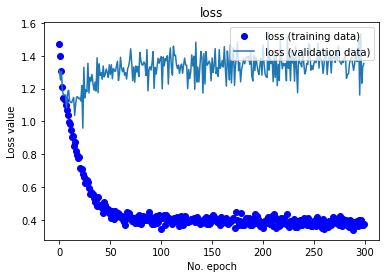

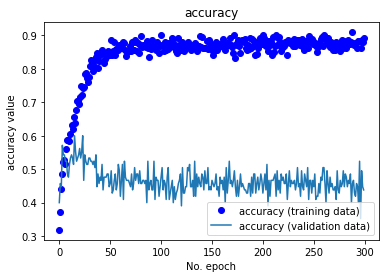

In [23]:
# Plot
plt.title('loss')
plt.plot(model_history.history['loss'],'bo', label=' loss (training data)')
plt.plot(model_history.history['val_loss'], label=' loss (validation data)')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.savefig('/home/b05501009/Jubo/7_8/plot/segmentation_loss_2.jpg')
plt.show()
plt.close('all')

plt.title('accuracy')
plt.plot(model_history.history['acc'],'bo', label='accuracy (training data)')
plt.plot(model_history.history['val_acc'], label='accuracy (validation data)')
plt.ylabel('accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="lower right")
plt.savefig('/home/b05501009/Jubo/7_8/plot/segmentation_acc_2.jpg')
plt.show()
plt.close('all')

In [50]:
df = pd.read_excel('/home/b05501009/Jubo/6_23/no_word_ruler/Test_TWCC.xlsx')
test_generator=train_datagen.flow_from_dataframe(
    dataframe=df, 
    directory=None,
    x_col="編號",
    y_col= "等級",
    class_mode="categorical",
    target_size=(224,224),
    batch_size=1,
    Seed = 501009,
    shuffle = False
)
test_generator.reset()

Found 25 validated image filenames belonging to 4 classes.


In [54]:
model = tf.keras.models.load_model('/home/b05501009/Jubo/6_23/no_word_ruler/model/model.hdf5')
y_test=model.predict(test_generator,verbose=1)

25/25 [==============================] - 0s 18ms/step


In [59]:
i = 0
for x,y in test_generator:
    print(y)
    y_test=model.predict(x,verbose=0)
    print(y_test)
    i += 1
    if i >=25:
        break

[[0. 0. 1. 0.]]
[[0.3850327  0.28740233 0.15627383 0.17129116]]
[[0. 0. 1. 0.]]
[[0.11268309 0.44935066 0.23707642 0.20088987]]
[[0. 0. 1. 0.]]
[[0.01344706 0.02769213 0.9482214  0.01063948]]
[[0. 0. 1. 0.]]
[[0.04088569 0.4086347  0.49759972 0.0528799 ]]
[[0. 0. 1. 0.]]
[[0.02574122 0.90896875 0.02920065 0.03608948]]
[[0. 0. 1. 0.]]
[[0.13154599 0.07890315 0.6232153  0.16633555]]
[[0. 0. 1. 0.]]
[[0.07761177 0.13345334 0.6849035  0.1040314 ]]
[[0. 0. 1. 0.]]
[[0.04845106 0.09527189 0.18578641 0.6704906 ]]
[[0. 0. 1. 0.]]
[[0.05910588 0.04352904 0.7351     0.16226512]]
[[0. 0. 1. 0.]]
[[0.18531214 0.07673077 0.20066202 0.5372951 ]]
[[0. 1. 0. 0.]]
[[0.22307831 0.40459856 0.2846561  0.08766706]]
[[0. 1. 0. 0.]]
[[0.43272787 0.19631414 0.24713801 0.12382004]]
[[0. 1. 0. 0.]]
[[0.13548842 0.39474022 0.2806382  0.18913308]]
[[0. 1. 0. 0.]]
[[0.10938131 0.25064084 0.4636132  0.17636462]]
[[0. 1. 0. 0.]]
[[0.08649705 0.7343465  0.13552274 0.0436337 ]]
[[1. 0. 0. 0.]]
[[0.24371864 0.5797817  

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [30]:
a = model.get_layer('vgg16')

In [34]:
import cv2
import numpy as np
import tensorflow as tf


IMAGE_PATH = '/home/b05501009/Jubo/6_23/database/1102.jpg'
LAYER_NAME = 'block5_conv3'
CAT_CLASS_INDEX = 2

img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)

model = tf.keras.models.load_model(r'F:\wound_photo\model\model.hdf5')

grad_model = tf.keras.models.Model([a.inputs], [a.get_layer(LAYER_NAME).output, a.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, CAT_CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)


cv2.imwrite('cam.png', output_image)

import matplotlib.pyplot as plt
plt.imshow(output_image)

ImportError: libSM.so.6: cannot open shared object file: No such file or directory